# Using Google Colab for Resource-Intensive Code

```
We will execute the code in google colab:
https://colab.research.google.com/drive/1BLRExwFvjaNIOjNg-TZrMYq9O8CVC_1y?authuser=1#scrollTo=63e98171
```

## Benefits
- Free GPU/TPU access
- Pre-installed ML libraries
- Google Drive integration
- Real-time collaboration

## Quick Start
1. Open the link
2. Make a copy (File → Save in Drive)
3. Enable GPU (Runtime → Change runtime type)
4. Run cells (Shift+Enter)

## Tips
- Monitor resources (Runtime → Manage sessions)
- Save regularly (auto-disconnects after inactivity)
- Mount Drive for persistent storage
- Load large datasets progressively

## Limitations
- ~12 hour sessions (free tier)
- Variable GPU availability
- Requires stable internet

In [ ]:
! pip install diffusers transformers accelerate ftfy

# Setting Up Stable Diffusion for Image-to-Image Translation

This code imports the necessary libraries for using Stable Diffusion's image-to-image translation capabilities:

### Core Components:

1. **PyTorch**: Deep learning framework that powers the Stable Diffusion model
   - `torch`: Main PyTorch library for tensor operations and GPU acceleration

2. **Image Processing**:
   - `PIL.Image`: Python Imaging Library for loading and manipulating images
   - `BytesIO`: Handles binary data as file-like objects
   - `numpy`: Provides array operations for image data manipulation

3. **Utilities**:
   - `requests`: HTTP library for downloading images from URLs
   - `display` from IPython: Renders images directly in Jupyter notebooks

4. **Diffusion Model**:
   - `StableDiffusionImg2ImgPipeline`: Specialized pipeline for transforming existing images based on text prompts

## Functionality

This setup allows you to:
- Load source images (either locally or from URLs)
- Provide text prompts to guide image transformation
- Control strength of transformation through model parameters
- Generate variations of existing images
- Display results directly in notebook environments

The image-to-image pipeline takes an initial image and modifies it according to your text prompt, preserving the overall composition while changing the style, elements, or other attributes specified in the prompt.

In [1]:
import torch
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from IPython.display import display

from diffusers import StableDiffusionImg2ImgPipeline

# Initializing Stable Diffusion for GPU Acceleration

This code loads and configures the Stable Diffusion v1.4 image-to-image pipeline with GPU optimization:

### Hardware Selection
- `device = "cuda"`: Sets the pipeline to run on NVIDIA GPU
  - Significantly faster than CPU for image generation
  - Requires a CUDA-compatible NVIDIA graphics card

### Model Loading Parameters
- **Model ID**: `"CompVis/stable-diffusion-v1-4"`
  - The original Stable Diffusion v1.4 release by CompVis
  - A foundational text-to-image and image-to-image model

- **Precision**: `revision="fp16"` and `torch_dtype=torch.float16`
  - Uses 16-bit floating point precision
  - Reduces memory usage by approximately 50%
  - Maintains good image quality while enabling faster generation

- **Authentication**: `use_auth_token=True`
  - Required to download the model
  - Uses your Hugging Face access token
  - Necessary because Stable Diffusion has content usage restrictions

- **Device Allocation**: `.to(device)`
  - Moves all model parameters to the GPU
  - Prepares the pipeline for GPU-accelerated inference

## Memory Requirements
This configuration requires approximately 4-5GB of GPU VRAM, making it compatible with most modern NVIDIA GPUs including the GTX 1060 (6GB) and above.

In [2]:
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:285: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that CompVis/stable-diffusion-v1-4 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'CompVis/stable-diffusion-v1-4 is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28

# Loading an Image from URL for Stable Diffusion

This code fetches an image from the web and prepares it for use with the Stable Diffusion image-to-image pipeline:

### Step 1: Define the Source
- The URL points to an image hosted through DuckDuckGo's image proxy
- The lengthy URL parameters contain the original source location and image settings

### Step 2: Download the Image
- `requests.get(url)`: Sends an HTTP GET request to retrieve the image data
- `response.content`: Contains the binary image data in memory

### Step 3: Process the Image
- `BytesIO(response.content)`: Creates a file-like object from the binary data
- `Image.open()`: Uses PIL to open the image from the memory buffer
- `.convert("RGB")`: Ensures the image is in RGB format
  - Converts any grayscale, RGBA, or other formats to standard RGB
  - Required for compatibility with Stable Diffusion

### Step 4: Store for Processing
- `init_image`: Now contains the prepared PIL Image object
- Ready to be used as the input for the image-to-image generation process

The image is now loaded in memory and properly formatted for transformation with the Stable Diffusion pipeline.

In [3]:
url = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flh6.googleusercontent.com%2Fproxy%2FQBZTSycU3BmNf_YnyU4vm7Ammqx-aKnQcXSr_mD5xn28buzYMdg4G4NZOoxF8-hhW-a_HenRvkeiOnwnRw4Ll0TYjcs9HehMcoFWWsCpqA5BKAQCOUeJ5yd2eXnIlcxd_F6n7dugodr4GuwtI7aNtIqETNci0EFPeyc6sgVUx4f_1wHb_RwEXRGTxbc3L5jqYbde-ArPVo4_HRuJPBhmq-hJ86M4%3Dw1200-h630-p-k-no-nu&f=1&nofb=1"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")


# Resizing an Image for Optimal Stable Diffusion Processing

## Purpose

This code resizes the previously loaded image to dimensions that work well with Stable Diffusion's image-to-image pipeline.

## Technical Details

- **Method**: Uses PIL's `resize()` function
- **New Dimensions**: 768 pixels wide by 512 pixels high
- **Aspect Ratio**: 3:2 (landscape orientation)
- **Resolution**: Balances quality and processing speed

## Why These Dimensions?

- **Multiple of 64**: Stable Diffusion works optimally with dimensions that are multiples of 8, with 64 being ideal
  - 768 = 12 × 64
  - 512 = 8 × 64

- **Memory Efficiency**: Keeps VRAM usage reasonable while maintaining good quality
  - Total pixel count: 393,216 (768 × 512)
  - Significantly less memory-intensive than higher resolutions

- **Processing Speed**: Faster generation compared to larger dimensions
  - Generation time typically increases exponentially with image size

- **Quality Balance**: Provides sufficient detail for most image-to-image transformations

Note that resizing may change the original aspect ratio if it differs from 3:2, potentially causing some distortion in the image. For images with significantly different proportions, cropping before resizing might better preserve important visual elements.

In [4]:
init_image = init_image.resize((768, 512))

print(f"Image type: {type(init_image)}")
print(f"Image dimensions: {init_image.size}")
print(f"Image mode: {init_image.mode}")

Image type: <class 'PIL.Image.Image'>
Image dimensions: (768, 512)
Image mode: RGB


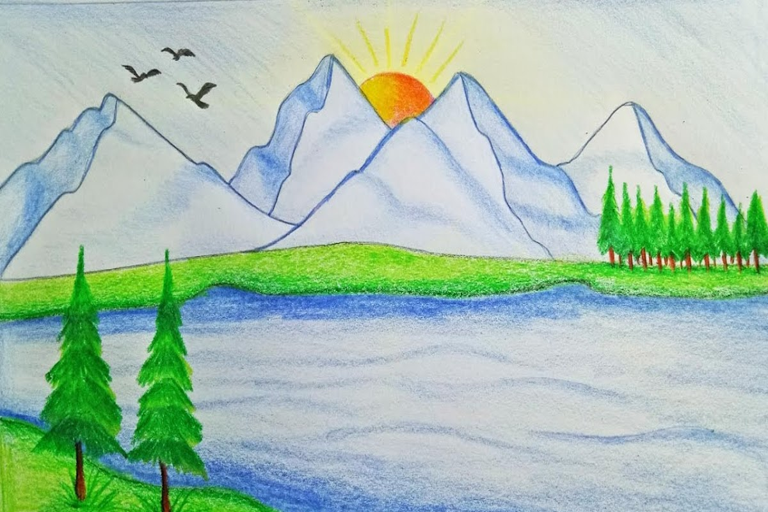

In [5]:
display(init_image)


# Defining a Prompt for Stable Diffusion Image Transformation


## Prompt Analysis

This prompt combines several key elements to guide the image-to-image transformation:

### Subject Matter
- **"a fantasy land"**: Defines the core content
  - Directs the model to generate fantastical, otherworldly landscapes
  - Suggests magical or surreal elements beyond realistic scenery

### Style Modifiers
- **"trending on artstation"**: Implies modern digital art quality
  - References a popular platform for professional digital artists
  - Signals high-quality, detailed, and visually impressive results
  - Typically produces vibrant colors and dramatic lighting

- **"by picasso"**: Specifies an artistic influence
  - Incorporates Pablo Picasso's distinctive cubist/abstract style
  - Suggests geometric fragmentation and multiple perspectives
  - Indicates non-realistic representation of forms and spaces

## Expected Effect

When applied to the previously loaded and resized image (768×512), this prompt will:

1. Maintain the general composition and structure of the original image
2. Transform it into a fantastical landscape with surreal elements
3. Apply stylistic elements reminiscent of Picasso's cubist approach
4. Enhance visual appeal with digital art aesthetics popular on ArtStation

The combination creates an interesting style fusion between classical cubism and modern digital fantasy art trends.

In [6]:
prompt = "a fantasy land, trending on artstation by picasso"
# prompt = "show a peacock in this landscape"

# Generating the Image with Stable Diffusion

This code executes the image-to-image generation using Stable Diffusion:

### Input Preparation
- `image_pil = init_image`: References the previously loaded and resized image
- This step is technically redundant but clarifies that we're using a PIL Image object

### CUDA Optimization
- `torch.autocast("cuda")`: Enables automatic mixed precision
  - Improves performance by using lower precision where appropriate
  - Reduces memory usage while maintaining quality
  - Complements the fp16 model configuration set earlier

### Generation Parameters
- **Prompt**: The previously defined text "a fantasy land, trending on artstation by picasso"
- **Strength**: `0.75` (75%)
  - Controls how much to transform the original image
  - 0.0 = no change, 1.0 = complete transformation
  - 0.75 provides significant transformation while preserving original composition
- **Guidance Scale**: `7.5`
  - Determines how closely the image follows the text prompt
  - Higher values (like 7.5) produce results that more strictly adhere to the prompt
  - Lower values allow more creative variation

### Error Handling
- The try/except block catches potential errors during generation
- Prints a success message if generation completes or an error message if it fails

### Visualization
- `display(output_image.images[0])`: Shows the generated image in the notebook
- The output is a transformed version of the original with Picasso-inspired fantasy elements

This approach creates a balance between preserving the original image's structure and applying the fantasy/cubist transformation specified in the prompt.

  0%|          | 0/37 [00:00<?, ?it/s]

Success with PIL image!


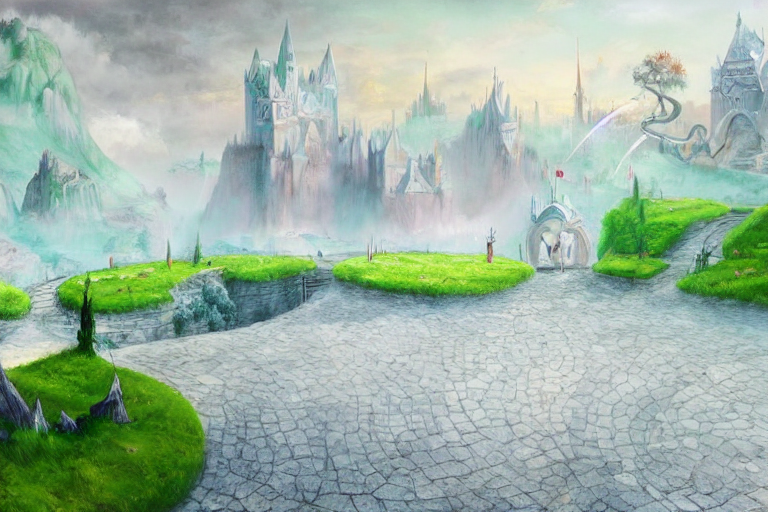

In [8]:
# As PIL Image (already have this)
image_pil = init_image

try:
    with torch.autocast("cuda"):
        output_image = pipe(prompt=prompt, image=image_pil, strength=0.75, guidance_scale=7.5)
    print("Success with PIL image!")
except Exception as e:
    print(f"Error with PIL image: {e}")

display(output_image.images[0])

# Alternative Approach: Using NumPy Arrays for Image Input

This code demonstrates an alternative method of providing the input image using NumPy arrays:

### Image Conversion
- `np.array(init_image)`: Converts the PIL Image to a NumPy array
- `print(f"NumPy array shape: {image_np.shape}")`: Displays the array dimensions
  - Expected output: `NumPy array shape: (512, 768, 3)`
  - This corresponds to (height, width, RGB channels)

### Stable Diffusion Processing
- Uses identical parameters to the previous example:
  - Same prompt: "a fantasy land, trending on artstation by picasso"
  - Same strength: 0.75 (75% transformation)
  - Same guidance scale: 7.5 (adherence to prompt)

### Technical Benefits of NumPy Format
- Flexibility for pre-processing (if needed):
  - Direct pixel manipulation
  - Channel adjustments
  - Custom transformations
- Compatibility with other libraries that work with NumPy arrays
- Potential integration with ML preprocessing pipelines

### Output Display
- Shows the resulting transformed image in the notebook
- Should produce results very similar to the PIL Image approach

This demonstrates the pipeline's flexibility in accepting different input formats while maintaining the same generation parameters and artistic direction.

NumPy array shape: (512, 768, 3)


  0%|          | 0/37 [00:00<?, ?it/s]

Success with NumPy array!


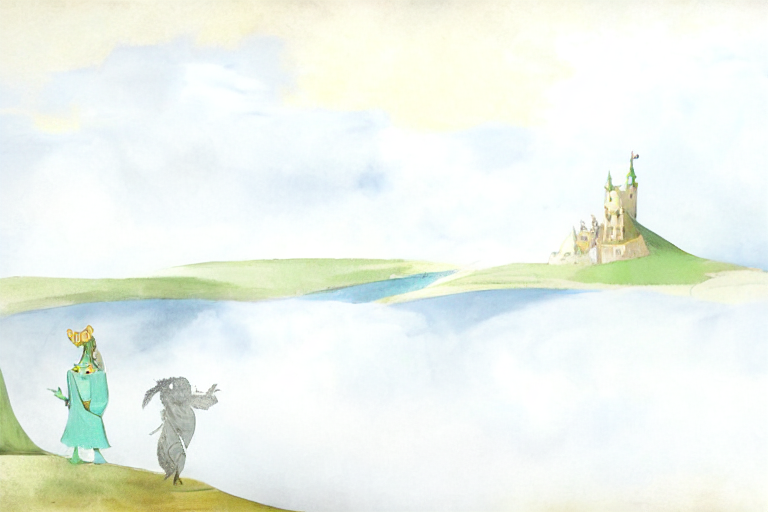

In [9]:
# As NumPy array
image_np = np.array(init_image)
print(f"NumPy array shape: {image_np.shape}")

try:
    with torch.autocast("cuda"):
        output_image = pipe(prompt=prompt, image=image_np, strength=0.75, guidance_scale=7.5)
    print("Success with NumPy array!")
except Exception as e:
    print(f"Error with NumPy array: {e}")

display(output_image.images[0])


# Advanced Approach: Using PyTorch Tensors Directly

This code demonstrates the most direct method for feeding images into Stable Diffusion using native PyTorch tensors:

### Tensor Conversion Process
- `torch.from_numpy(image_np)`: Converts NumPy array to PyTorch tensor
- `.permute(2, 0, 1)`: Rearranges dimensions from:
  - NumPy/PIL format: (Height, Width, Channels)
  - To PyTorch format: (Channels, Height, Width)
- `.float()`: Converts integer pixel values to floating point
- `/ 255.0`: Normalizes pixel values from [0-255] to [0-1] range
  - Required for proper model processing

### Tensor Information
- `print(f"Tensor shape: {image_tensor.shape}")`: Displays tensor dimensions
  - Expected output: `Tensor shape: (3, 512, 768)`
  - This corresponds to (RGB channels, height, width)

### Generation Parameters
- Same prompt and settings as previous examples:
  - 75% transformation strength
  - 7.5 guidance scale for prompt adherence

### Technical Advantages
- **Maximum Efficiency**: Eliminates conversion overhead within the pipeline
- **GPU Memory Optimization**: Data already in format needed by model
- **Integration Potential**: Perfect for workflows with other PyTorch models
- **Fine Control**: Direct manipulation of tensor attributes if needed

This approach represents the most "native" way to work with Stable Diffusion's pipeline, as the model internally works with tensors in exactly this format.

Tensor shape: torch.Size([3, 512, 768])


  0%|          | 0/37 [00:00<?, ?it/s]

Success with PyTorch tensor!


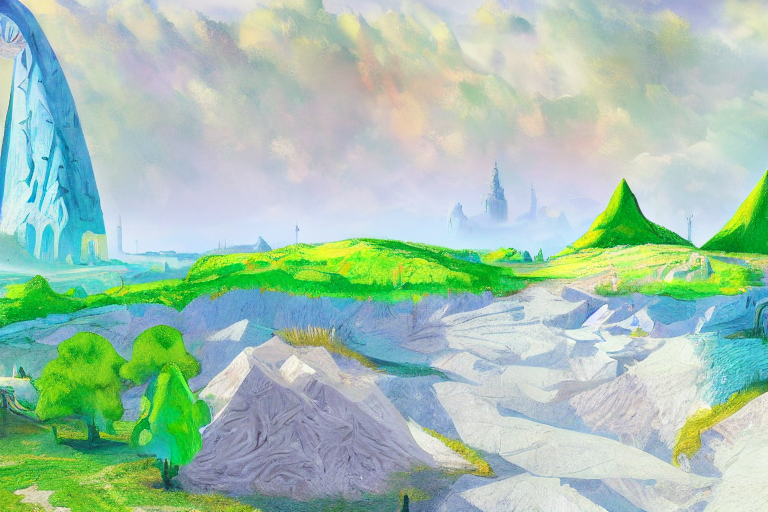

In [10]:
# As PyTorch tensor
image_tensor = torch.from_numpy(image_np).permute(2, 0, 1).float() / 255.0  # Convert to CHW format and normalize
print(f"Tensor shape: {image_tensor.shape}")

try:
    with torch.autocast("cuda"):
        output_image = pipe(prompt=prompt, image=image_tensor, strength=0.75, guidance_scale=7.5)
    print("Success with PyTorch tensor!")
except Exception as e:
    print(f"Error with PyTorch tensor: {e}")

display(output_image.images[0])